Importing Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf

# Set the random seeds
tf.random.set_seed(3)

from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading The MNIST Data (Image Data)

In [2]:
# The dataset already has processed data and has split into train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
type(x_train)

numpy.ndarray

In [4]:
# The images have already been converted to a numpy array, so no need to convert them

# Shape of numpy arrays
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
# 60,000 images, dimension - 28 x 28 -> x_train (all images are grayscale images)
# 60,000 labels - corresponding to x_train images -> y_train
# Grayscale image has only 1 channel

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [5]:
# Printing an image from the x_train dataset
print(x_train[7])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  38  43 105 255 253 253 253
  253 253 174   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  43 139 224 226 252 253 252 252 252
  252 252 252 158  14   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 178 252 252 252 252 253 252 252 252
  252 252 252 252  59   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 109 252 252 230 132 133 13

In [6]:
# The image is already in a numpy array form, so we can easily convert it back to an image
print(x_train[7].shape)

(28, 28)


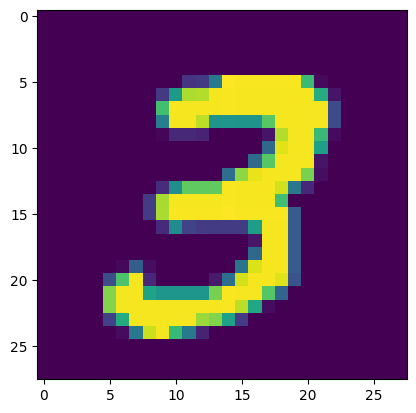

3


In [7]:
# Displaying the image
plt.imshow(x_train[7])
plt.show()

# Printing the corresponding label
print(y_train[7])

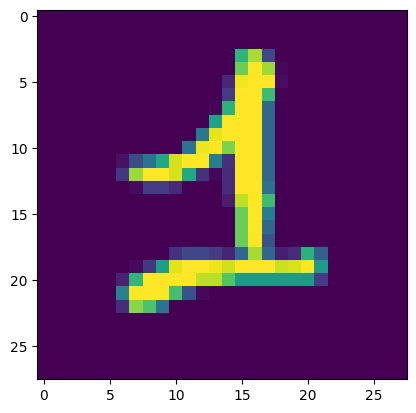

1


In [8]:
# You can do this for any other image of the dataset too
plt.imshow(x_train[24])
plt.show()

# Printing the corresponding label
print(y_train[24])

Image Labels Analysis

In [9]:
# We observe that the image and their labels are correct
y_train.shape, y_test.shape

((60000,), (10000,))

In [10]:
# Unique values in y_train and y_test
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


Scaling The Values

In [11]:
# We can use these labels as it is or else we can also apply "One Hot Encoding"
# All images have same 28 x 28 dimension in this dataset, if not; we have to resize all these images to some common dimension

# Pixel range - 0 to 255 -> instead of having this, we will have values ranging from 0 to 1 (NORMALIZATION)
x_train = x_train/255
x_test = x_test/255
# 0/255 - 0 (min value)
# 255/255 - 1 (max value)
# All other values in between 0 & 1

In [12]:
# Checking the range
print(x_train[7])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building The Neural Network

In [13]:
# We are building a normal and simple neural network
# Setting up the layers of the Neural Network
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    # Creating a dense layer with 50 number of neurons
    # Activation function - relu (most widely used and efficient activation function)
    # relu - rectified linear unit
    keras.layers.Dense(50, activation = 'relu'),
    # Creating another layer
    keras.layers.Dense(50, activation = 'relu'),
    # Creating the output layer
    # No of neurons = 10 because we have 10 classes in labels [0 to 9]
    keras.layers.Dense(10, activation = 'sigmoid')
])

In [14]:
# Compiling the neural network - layers
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              # For one hot encoding, loss function will be "categorical_crossentropy"
              metrics = ['accuracy'])

Training The Neural Network

In [15]:
# Training our neural network
# epochs - how many times the neural network has to go through the data
model.fit(x_train, y_train, epochs = 17)

Epoch 1/17
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2943 - accuracy: 0.9154
Epoch 2/17
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1307 - accuracy: 0.9602
Epoch 3/17
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0953 - accuracy: 0.9714
Epoch 4/17
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0786 - accuracy: 0.9757
Epoch 5/17
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0655 - accuracy: 0.9798
Epoch 6/17
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0564 - accuracy: 0.9821
Epoch 7/17
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0483 - accuracy: 0.9842
Epoch 8/17
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0434 - accuracy: 0.9858
Epoch 9/17
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0379 - accuracy: 0.9878
Epoch 10/17
1875/1875 [==============================] - 3s 1ms/step - loss: 0.034

Accuracy On Test Data- Model Evaluation

In [16]:
# Evaluating the model
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.1073 - accuracy: 0.9767
0.9767000079154968


---

Training data accuracy = 99.31% 

Test data accuracy = 97.67%

---

In [17]:
print(x_test.shape)

(10000, 28, 28)


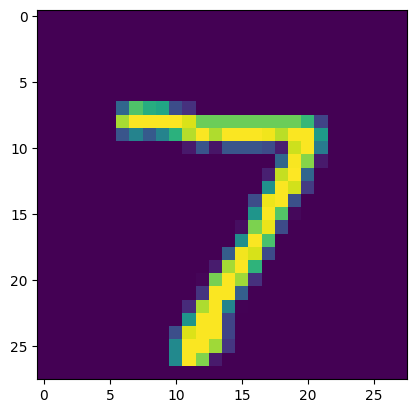

7


In [18]:
# First data point in x_test
plt.imshow(x_test[0])
plt.show()

print(y_test[0])

In [19]:
# Predicting labels for test data
y_pred = model.predict(x_test)
y_pred.shape

313/313 [==============================] - 0s 1ms/step


(10000, 10)

In [20]:
print(y_pred[0])
# Each value given below shows probablity for each label

[4.3696980e-04 5.2653332e-03 2.1859625e-02 7.7805442e-01 3.6606394e-07
 1.5428791e-06 2.4497684e-09 9.9999934e-01 8.4597943e-04 1.5558797e-02]


---

NOTE : model.predict() gives the prediction probability of each class for that particular data point

---

In [21]:
# Converting the prediction probabilities to class labels
label_for_1_test_image = np.argmax(y_pred[0])
label_for_1_test_image

7

In [22]:
# Converting prediction probabilities to class labels for all test data points
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 3, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 5, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

---

y_test --> true labels

y_pred_labels --> predicted labels

---

Building The Confusion Matrix

In [23]:
# Building the confusion matrix
confusion = confusion_matrix(y_test, y_pred_labels)
print(confusion)

tf.Tensor(
[[ 971    1    0    1    1    0    1    0    3    2]
 [   0 1118    3    3    0    1    2    2    6    0]
 [   3    1 1007    8    1    1    1    4    6    0]
 [   0    0    5  989    0    3    0    3    8    2]
 [   1    0    4    1  967    0    4    2    1    2]
 [   2    0    0   35    2  834   14    0    4    1]
 [   2    2    1    2    4    1  946    0    0    0]
 [   1    3    7    7    1    0    0 1001    5    3]
 [   3    0    1    6    3    1    5    2  949    4]
 [   3    2    1    9   11    3    0    6    6  968]], shape=(10, 10), dtype=int32)


Text(0.5, 25.722222222222214, 'Predicted Labels')

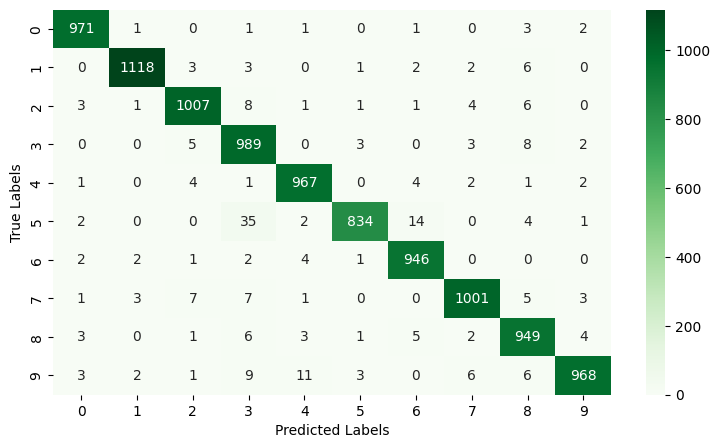

In [24]:
# Building a heatmap with the above values
plt.figure(figsize = (9, 5))
# fmt = d -> because all the values in confusion matrix are integers
sns.heatmap(confusion, annot = True, fmt = 'd', cmap = 'Greens')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building A Predictive System

In [25]:
input_image_path = 'input image 7.png'

# Read the image and convert it to a numpy array
input_image = cv2.imread(input_image_path)
type(input_image)

numpy.ndarray

In [26]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


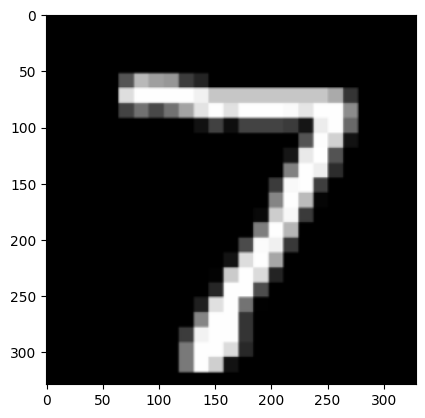

In [27]:
plt.imshow(input_image)
plt.show()

In [28]:
input_image.shape

(329, 329, 3)

In [29]:
# Convert the input image into a grayscale image and resizing it
# cvtCOLOR -> convert the color
# Color conversion
gray = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
gray.shape

(329, 329)

In [30]:
# Resizing the image
resize_img = cv2.resize(gray, (28,28))
resize_img.shape

(28, 28)

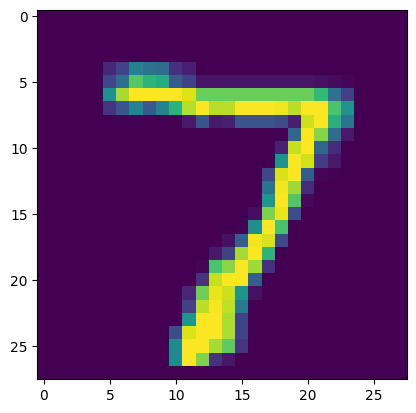

In [31]:
plt.imshow(resize_img)
plt.show()

In [32]:
# Scaling the input image
resize_img = resize_img/255
type(resize_img)

numpy.ndarray

In [33]:
# Telling the predicting model that only one image label has to be predicted and image dimension is 28 x 28
reshaped_image = np.reshape(resize_img, [1, 28, 28])

In [34]:
input_pred = model.predict(reshaped_image)
print(input_pred)

1/1 [==============================] - 0s 26ms/step
[[1.9981008e-09 5.2914375e-01 9.9997234e-01 9.9976528e-01 1.4823379e-13
  8.9316638e-03 1.0954111e-14 9.9999315e-01 1.2601516e-02 4.8958047e-08]]


In [35]:
input_pred_label = np.argmax(input_pred)
print(input_pred_label)

7


---

The model has correctly predicted the image. Now, consolidaing all the above code in a single cell and building the final working digit recognition model.

---

PREDICTIVE SYSTEM


Image path: C:\Users\FATHIMA ISMAIL\OneDrive\Desktop\Bharat Intern Internship\Bharat Intern TASK 3\input image.png

Image Given:


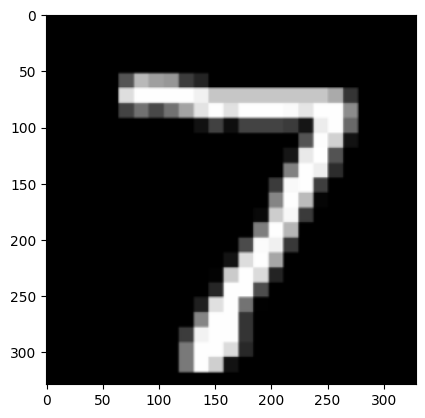

1/1 [==============================] - 0s 34ms/step


The input image given by user is recognized by the system as: 7


In [37]:
input_image_path = input("Enter Image Path:")
input_image = cv2.imread(input_image_path)

print("\nImage path:",input_image_path)
print("\nImage Given:")
plt.imshow(input_image)
plt.show()

gray = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
resize_img = cv2.resize(gray, (28,28))

resize_img = resize_img/255
reshaped_image = np.reshape(resize_img, [1, 28, 28])

input_pred = model.predict(reshaped_image)
input_pred_label = np.argmax(input_pred)
print("\n\nThe input image given by user is recognized by the system as:", input_pred_label)